In [24]:
import pandas as pd 
import numpy as np

import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from gensim.models import Word2Vec
from sklearn.metrics.pairwise import cosine_similarity
import networkx as nx
import matplotlib.pyplot as plt

from sklearn.decomposition import PCA
from mpl_toolkits.mplot3d import Axes3D
from sklearn.cluster import KMeans
import zipfile

from gensim.models import KeyedVectors
import os

In [4]:
with zipfile.ZipFile("188.zip", 'r') as zip_ref:
    zip_ref.extractall("188")

In [8]:
# Define the directory containing the models
models_dir = '188'

# Dictionary to hold the loaded models
models = {}

# Load all Word2Vec models from the specified directory
for filename in os.listdir(models_dir):
    if filename.endswith('.bin'):  # assuming your models have a .bin extension
        model_path = os.path.join(models_dir, filename)
        model_name = os.path.splitext(filename)[0]
        models[model_name] = KeyedVectors.load_word2vec_format(model_path, binary=True)

In [9]:
models

{'2000': <gensim.models.keyedvectors.KeyedVectors at 0x1526796e56d0>,
 '1970': <gensim.models.keyedvectors.KeyedVectors at 0x15267987b080>,
 '1980': <gensim.models.keyedvectors.KeyedVectors at 0x15266b74ca10>,
 '1990': <gensim.models.keyedvectors.KeyedVectors at 0x152665064560>,
 '1960': <gensim.models.keyedvectors.KeyedVectors at 0x152665064590>}

In [52]:
# Get the word embedding vector for "accountability" from each model
word = "accountability_NOUN"
nearest_neighbors_vectors = {}

for model_name, model in models.items():
    if word in model.key_to_index:
        neighbors = model.most_similar(word, topn=10)  # Specify the number of neighbors you want
        nearest_neighbors_vectors[model_name] = {word: model[word]}
        for neighbor in neighbors:
            neighbor_word = neighbor[0]
            neighbor_vector = model[neighbor_word]
            nearest_neighbors_vectors[model_name][neighbor_word] = neighbor_vector
    else:
        print(f"'{word}' not found in model {model_name}")

In [40]:
word_vectors

{'2000': array([ 0.1900011 ,  0.01414841,  0.41727805,  0.06136048,  0.89192474,
         0.742434  , -0.9148444 ,  1.0919002 ,  0.16330798, -0.1382241 ,
        -0.6205654 ,  0.9495058 ,  0.07703228,  0.01638987,  0.09985796,
        -0.6241897 , -0.47295636, -0.07790484, -1.1963955 , -0.19775172,
         0.26946893,  0.10449857,  0.20388432,  0.08424263,  0.18166125,
        -0.24113436,  0.15399821,  0.16829453, -0.14699955,  0.18971542,
        -0.245105  ,  0.35323828,  0.51847416, -0.63633204, -0.74818456,
        -0.13395025, -0.45610884, -0.29341283, -0.36291403,  0.3364406 ,
         0.16700211, -0.41713336, -0.06430999, -0.1493598 , -0.7535362 ,
         1.2217524 , -0.01591751,  0.4193361 ,  0.2050844 , -0.21669333,
        -0.61842877, -0.6499045 ,  0.2944689 , -0.10145181,  0.23950408,
        -0.01812615, -0.19756293, -0.35033208, -0.79190534, -0.72531146,
         0.45962068,  0.8838079 , -0.37263468, -0.07437271, -0.146814  ,
        -0.22483183, -0.00646532, -0.050701

In [53]:
# Prepare data for PCA and plotting
words = []
vectors = []
for model_name, neighbors in nearest_neighbors_vectors.items():
    for word, vector in neighbors.items():
        words.append((model_name, word))  # Store model name along with word
        vectors.append(vector)

In [54]:
words

[('2000', 'accountability_NOUN'),
 ('2000', 'transparency_NOUN'),
 ('2000', 'oversight_NOUN'),
 ('2000', 'reform_NOUN'),
 ('2000', 'mandate_NOUN'),
 ('2000', 'reform_VERB'),
 ('2000', 'regulatory_ADJ'),
 ('2000', 'implementation_NOUN'),
 ('2000', 'regulatory_NOUN'),
 ('2000', 'preparedness_NOUN'),
 ('2000', 'state_ADJ'),
 ('1970', 'accountability_NOUN'),
 ('1970', 'conformity_NOUN'),
 ('1970', 'regulatory_ADJ'),
 ('1970', 'normative_ADJ'),
 ('1970', 'governe_VERB'),
 ('1970', 'ethical_ADJ'),
 ('1970', 'viability_NOUN'),
 ('1970', 'managerial_ADJ'),
 ('1970', 'institutionalization_NOUN'),
 ('1970', 'representation_NOUN'),
 ('1970', 'cognitive_ADJ'),
 ('1980', 'accountability_NOUN'),
 ('1980', 'safeguard_NOUN'),
 ('1980', 'adherence_NOUN'),
 ('1980', 'integrity_NOUN'),
 ('1980', 'mediation_NOUN'),
 ('1980', 'impartiality_NOUN'),
 ('1980', 'quasi_NOUN'),
 ('1980', 'objectivity_NOUN'),
 ('1980', 'acceptance_NOUN'),
 ('1980', 'equality_NOUN'),
 ('1980', 'socialistic_ADJ'),
 ('1990', 'accoun

In [45]:
vectors

[array([ 0.1900011 ,  0.01414841,  0.41727805,  0.06136048,  0.89192474,
         0.742434  , -0.9148444 ,  1.0919002 ,  0.16330798, -0.1382241 ,
        -0.6205654 ,  0.9495058 ,  0.07703228,  0.01638987,  0.09985796,
        -0.6241897 , -0.47295636, -0.07790484, -1.1963955 , -0.19775172,
         0.26946893,  0.10449857,  0.20388432,  0.08424263,  0.18166125,
        -0.24113436,  0.15399821,  0.16829453, -0.14699955,  0.18971542,
        -0.245105  ,  0.35323828,  0.51847416, -0.63633204, -0.74818456,
        -0.13395025, -0.45610884, -0.29341283, -0.36291403,  0.3364406 ,
         0.16700211, -0.41713336, -0.06430999, -0.1493598 , -0.7535362 ,
         1.2217524 , -0.01591751,  0.4193361 ,  0.2050844 , -0.21669333,
        -0.61842877, -0.6499045 ,  0.2944689 , -0.10145181,  0.23950408,
        -0.01812615, -0.19756293, -0.35033208, -0.79190534, -0.72531146,
         0.45962068,  0.8838079 , -0.37263468, -0.07437271, -0.146814  ,
        -0.22483183, -0.00646532, -0.05070113, -0.6

In [55]:
vectors = np.array(vectors)

# Perform PCA
pca = PCA(n_components=2)
pca_result = pca.fit_transform(vectors)



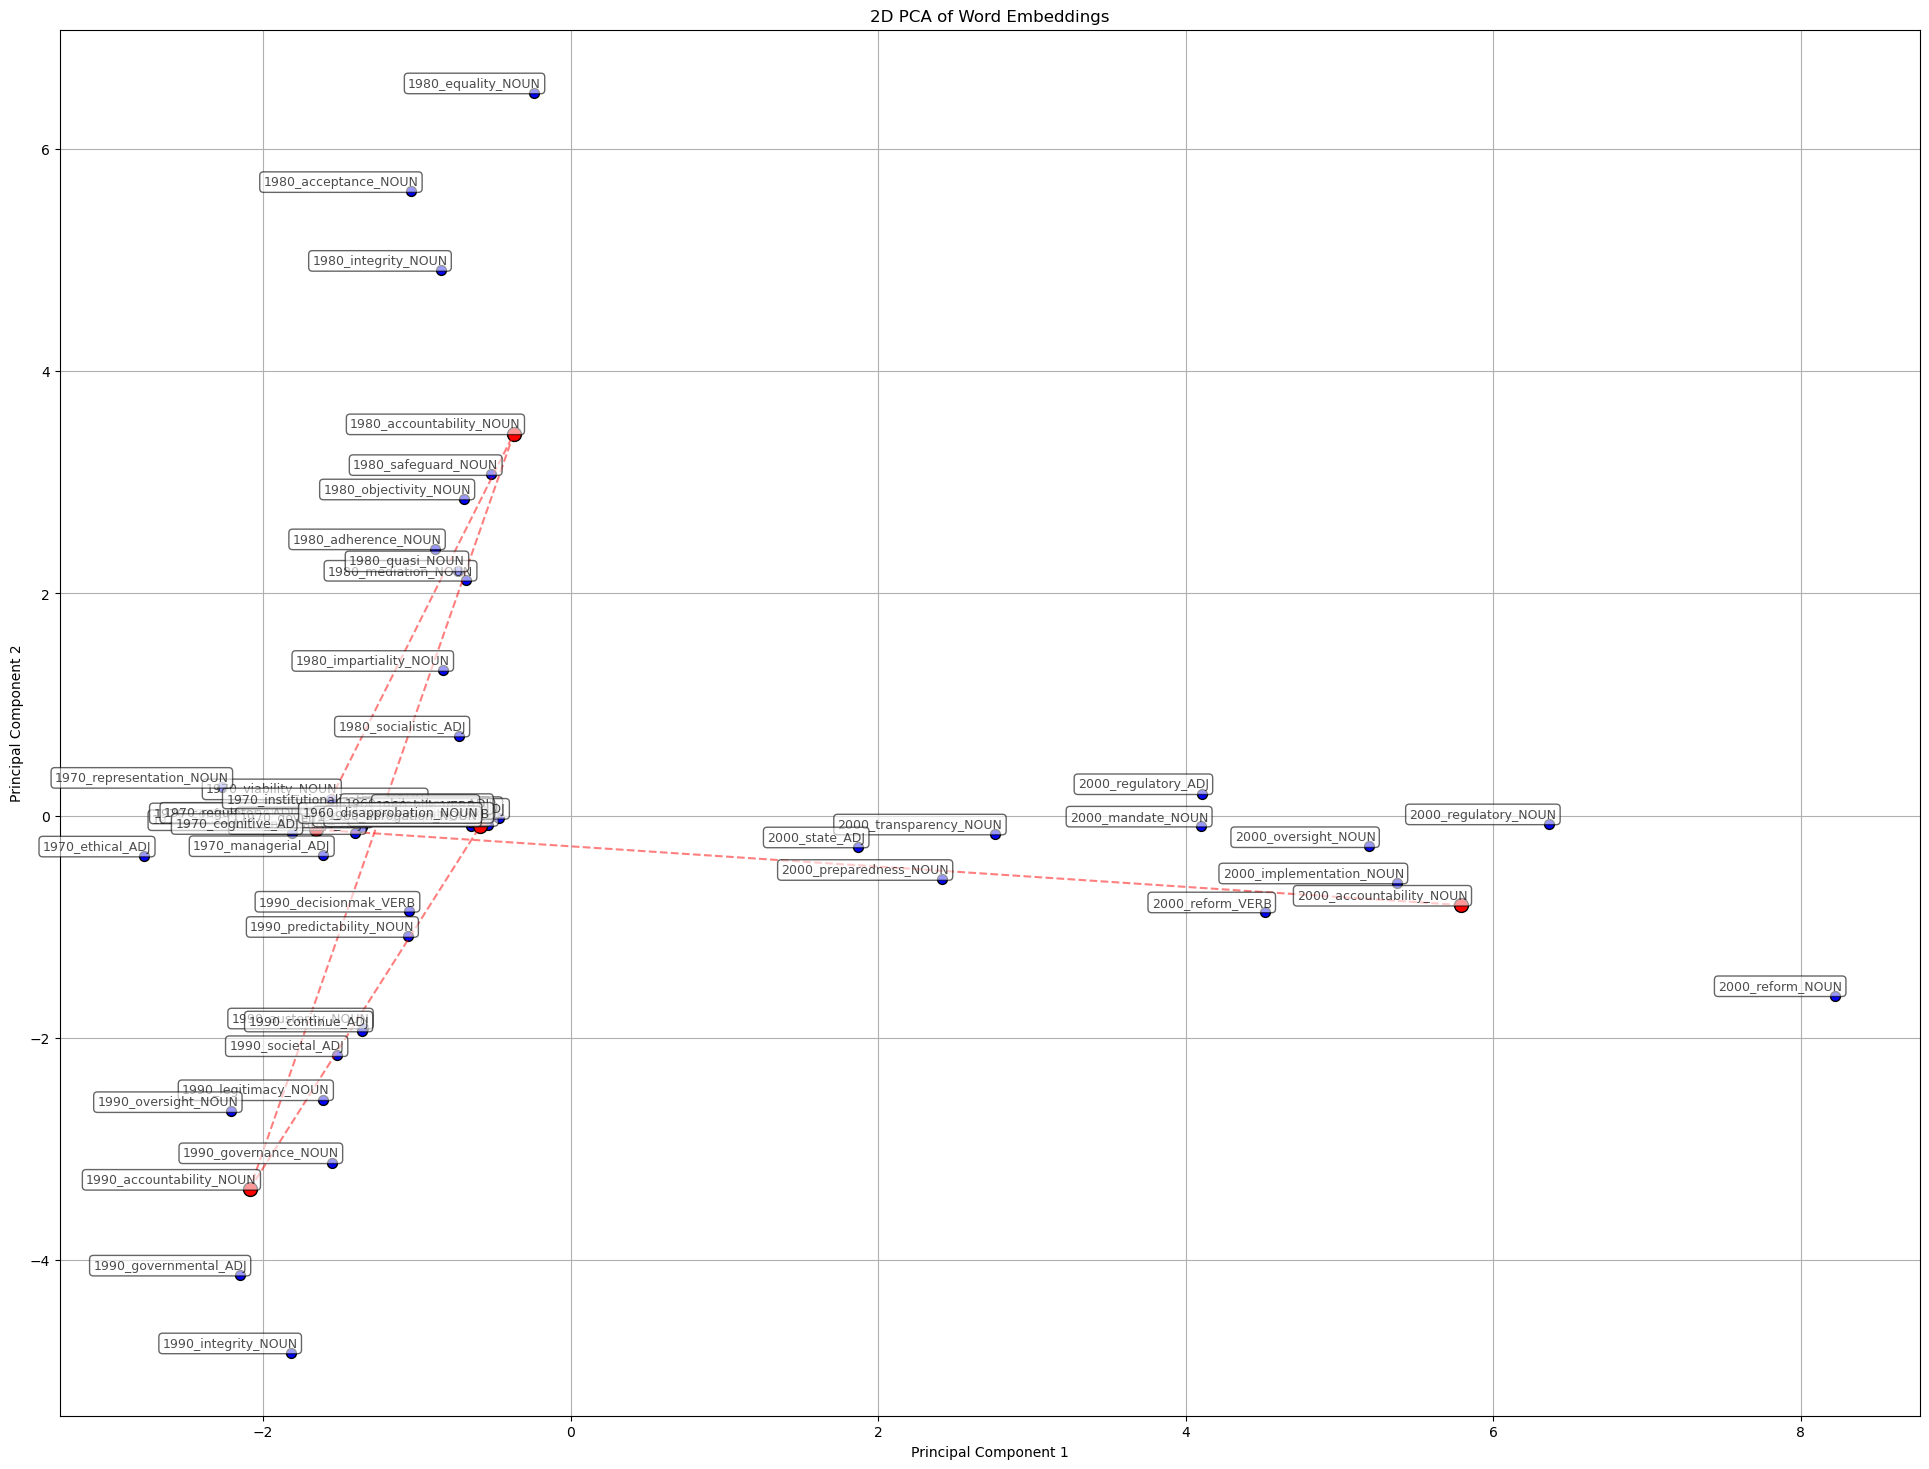

In [68]:
# Plot the 2D graph
plt.figure(figsize=(24, 18))  # Increase the plot size

# Separate "accountability" points and its neighbors
accountability_points = [(pca_result[i, 0], pca_result[i, 1]) for i, (model_name, word) in enumerate(words) if word == "accountability_NOUN"]
neighbor_points = [(pca_result[i, 0], pca_result[i, 1]) for i, (model_name, word) in enumerate(words) if word != "accountability_NOUN"]

# Plot neighbor points
plt.scatter(*zip(*neighbor_points), c='blue', marker='o', edgecolors='black', s=50)

# Plot "accountability" points
plt.scatter(*zip(*accountability_points), c='red', marker='o', edgecolors='black', s=100)

# Connect "accountability" points with lines
for i in range(len(accountability_points) - 1):
    plt.plot([accountability_points[i][0], accountability_points[i + 1][0]],
             [accountability_points[i][1], accountability_points[i + 1][1]],
             c='red', linestyle='--', alpha=0.5)

# Annotate points with model names
for i, (model_name, word) in enumerate(words):
    plt.annotate(f"{model_name}_{word}",
                 xy=(pca_result[i, 0], pca_result[i, 1]),
                 xytext=(5, 2),
                 textcoords='offset points',
                 ha='right',
                 va='bottom',
                 fontsize=9,
                 alpha=0.7,
                 bbox=dict(boxstyle='round,pad=0.3', edgecolor='red' if word == "accountability" else 'black', facecolor='white', alpha=0.6))

plt.title('2D PCA of Word Embeddings')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.grid(True)
plt.savefig('word_embeddings_pca.png')

plt.show()

In [51]:
words

['2000_accountability_NOUN',
 '2000_transparency_NOUN',
 '2000_oversight_NOUN',
 '2000_reform_NOUN',
 '2000_mandate_NOUN',
 '2000_reform_VERB',
 '2000_regulatory_ADJ',
 '2000_implementation_NOUN',
 '2000_regulatory_NOUN',
 '2000_preparedness_NOUN',
 '2000_state_ADJ',
 '1970_accountability_NOUN',
 '1970_conformity_NOUN',
 '1970_regulatory_ADJ',
 '1970_normative_ADJ',
 '1970_governe_VERB',
 '1970_ethical_ADJ',
 '1970_viability_NOUN',
 '1970_managerial_ADJ',
 '1970_institutionalization_NOUN',
 '1970_representation_NOUN',
 '1970_cognitive_ADJ',
 '1980_accountability_NOUN',
 '1980_safeguard_NOUN',
 '1980_adherence_NOUN',
 '1980_integrity_NOUN',
 '1980_mediation_NOUN',
 '1980_impartiality_NOUN',
 '1980_quasi_NOUN',
 '1980_objectivity_NOUN',
 '1980_acceptance_NOUN',
 '1980_equality_NOUN',
 '1980_socialistic_ADJ',
 '1990_accountability_NOUN',
 '1990_governance_NOUN',
 '1990_austerity_NOUN',
 '1990_legitimacy_NOUN',
 '1990_societal_ADJ',
 '1990_governmental_ADJ',
 '1990_decisionmak_VERB',
 '199